<a href="https://colab.research.google.com/github/guimaraaes/data-science/blob/master/RedesNeuraisConvolucionais-MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
import tensorflow as tf
from tensorflow import keras

# from tensorflow.keras.datasets import mnist
# mnist

(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = keras.datasets.mnist.load_data()

# y_train = y_train.reshape(y_train.shape[0], 1)

In [ ]:
print(X_train_orig.shape)  
print(X_test_orig.shape) 

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(y_train_orig.shape)  
print(y_test_orig.shape)  

(60000,)
(10000,)


In [ ]:
print('y classes')
np.unique(y_train_orig, return_counts=True)

y classes


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
print('y classes')
np.unique(y_test_orig, return_counts=True)

y classes


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

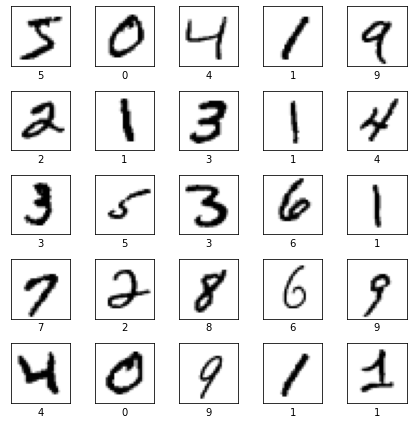

In [ ]:
plt.figure(figsize=(6,6))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train_orig[i], cmap=plt.cm.binary)
  plt.xlabel(y_train_orig[i])
plt.tight_layout()


In [ ]:
# X_train[1]
transf = lambda x: (x/255).astype('float32')
X_train = transf(X_train_orig)
X_test = transf(X_test_orig)
# X_train[1]

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(X_train.shape)  
print(X_test.shape) 

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
class_names = np.unique(y_train_orig)
class_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# y_train_label = y_train

In [ ]:
y_train = keras.utils.to_categorical(y_train_orig)
y_test = keras.utils.to_categorical(y_test_orig)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
# baseado na implementação da MiniVGGNet do Adrian Rosebroke
# first CONV => RELU => CONV => RELU => POOL layer set
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 3, padding="same", activation='relu',))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

# softmax classifier
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

# treinar o modelo e salvar as informações em history
history = model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1904 - accuracy: 0.9427 - val_loss: 0.0712 - val_accuracy: 0.9782
Epoch 2/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0734 - accuracy: 0.9781 - val_loss: 0.0525 - val_accuracy: 0.9850
Epoch 3/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0635 - accuracy: 0.9806 - val_loss: 0.0427 - val_accuracy: 0.9871
Epoch 4/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0549 - accuracy: 0.9830 - val_loss: 0.0374 - val_accuracy: 0.9888
Epoch 5/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0442 - accuracy: 0.9866 - val_loss: 0.0391 - val_accuracy: 0.9886
Epoch 6/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0464 - accuracy: 0.9851 - val_loss: 0.0375 - val_accuracy: 0.9896
Epoch 7/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.0342 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
y_hat = model.predict(X_test)
y_hat_classes = np.argmax(y_hat, axis=1)
print(classification_report(y_test_orig, y_hat_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      1.00      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



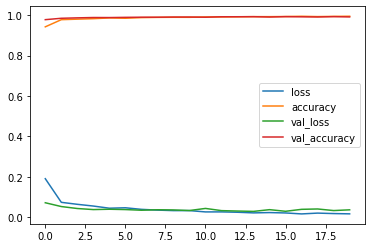

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
score = model.evaluate(X_test, y_test)

# verificar o desempenho do modelo
print('Loss: {:.4f}'.format(score[0]))
print('Acurácia: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0253 - accuracy: 0.9936
Loss: 0.0253
Acurácia: 0.9936
